In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv')
dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
cols_names = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']
dataset = pd.read_csv('/content/drive/MyDrive/car_evaluation.csv', names = cols_names )
dataset.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
dataset.shape

(1728, 7)

In [ ]:
#number of items in each class
CLASS_COUNTS = dataset['Evaluation'].value_counts()
print(CLASS_COUNTS)

unacc    1210
acc       384
good       69
vgood      65
Name: Evaluation, dtype: int64


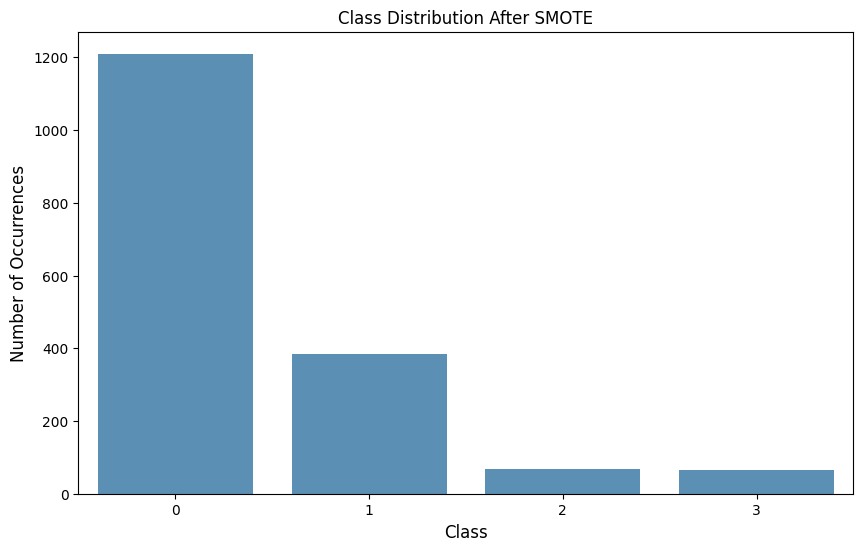

In [ ]:
#data visualization
# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(CLASS_COUNTS.values, alpha=0.8)

plt.title('Class Distribution After SMOTE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

In [ ]:
#check if there are any missing values in our dataset
dataset.isnull().sum()

Buying        0
Maint         0
Doors         0
Persons       0
LugBoot       0
Safety        0
Evaluation    0
dtype: int64

In [ ]:
# Use pd.get_dummies to convert categorical variables into dummy/indicator variable-one-hot-encoding
features = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety']
dataset_encoded = pd.get_dummies(dataset, columns=features)

In [ ]:
dataset_encoded.head()

,Evaluation,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maint_high,Maint_low,Maint_med,Maint_vhigh,Doors_2,...,Doors_5more,Persons_2,Persons_4,Persons_more,LugBoot_big,LugBoot_med,LugBoot_small,Safety_high,Safety_low,Safety_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
# Separate features and target
x = dataset_encoded.drop('Evaluation', axis=1)
y = dataset_encoded['Evaluation']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
#number of items in each class
class_counts = y_train_smote.value_counts()

print(class_counts)

unacc    975
acc      975
vgood    975
good     975
Name: Evaluation, dtype: int64


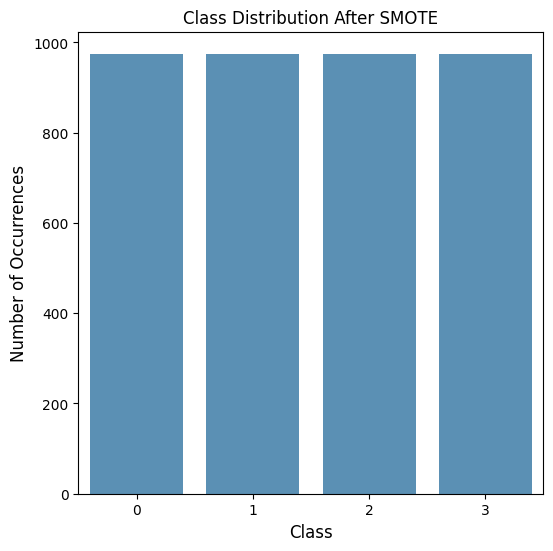

In [ ]:
# Create a bar plot
plt.figure(figsize=(6,6))
sns.barplot(class_counts.values, alpha=0.8)

plt.title('Class Distribution After SMOTE')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

In [ ]:
# Initialize Logistic Regression
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_smote, y_train_smote)

# Predict the classes on the test set
y_pred = model.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.69      0.45      0.54        83
        good       0.38      0.82      0.51        11
       unacc       0.90      0.93      0.91       235
       vgood       0.68      1.00      0.81        17

    accuracy                           0.81       346
   macro avg       0.66      0.80      0.69       346
weighted avg       0.82      0.81      0.81       346



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train_smote, y_train_smote)

# Predict the classes on the test set
y_pred = rf.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.97      0.89      0.93        83
        good       0.53      0.91      0.67        11
       unacc       1.00      1.00      1.00       235
       vgood       0.82      0.82      0.82        17

    accuracy                           0.96       346
   macro avg       0.83      0.90      0.85       346
weighted avg       0.97      0.96      0.96       346



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable y
y_encoded = le.fit_transform(y_train_smote)
y_encoded_test = le.fit_transform(y_test)

In [ ]:
# Initialize XGBoost
xgb_model = XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_smote, y_encoded)

# Predict the classes on the test set
y_pred = xgb_model.predict(x_test)

# Print the classification report
print(classification_report(y_encoded_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        83
           1       0.61      1.00      0.76        11
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00        17

    accuracy                           0.98       346
   macro avg       0.90      0.98      0.93       346
weighted avg       0.99      0.98      0.98       346



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Predict the classes on the test set
y_pred = xgb_model.predict(x_test)

#compute accuracy score
acc = accuracy_score(y_encoded_test, y_pred)
print(acc)

# Compute the confusion matrix
cm = confusion_matrix(y_encoded_test, y_pred)

# Print the confusion matrix
print(cm)

0.9797687861271677
[[ 76   7   0   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  0   0   0  17]]
